# Skip-Gram Implementation

In [15]:
# import necessary libraries
import numpy as np
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [16]:
# Step 1: Load the text corpus
sentences = []
with open('file.txt', 'r') as f:
    for line in f:
        sentences.append(line.strip().split('.'))

# Step 2: Preprocess the text corpus
corpus=[]
# Iterate through the list of sentences, break them into lists of words and remove the empty strings
for i in range(len(sentences)):
    sentences[i] = sentences[i][0].split(' ')

    # strip the words of any special characters
    sentences[i] = [word.strip(',?;"!').lower() for word in sentences[i]]

    sentences[i] = list(filter(None, sentences[i]))
    if(len(sentences[i])>0):
        corpus.append(sentences[i])

# print(corpus)


In [17]:
# Step 3: Build the vocabulary
vocab = []
for sentence in corpus:
    for word in sentence:
        if word not in vocab:
            vocab.append(word)

vocab_size = len(vocab)

# Step 4: Build the training data (skip-gram pairs)
# Build the training data by creating a list of tuples of the form (current_word, context_word)
context_size = 2            
word_pairs = []
for sentence in corpus:
    for i in range(len(sentence)):
        for j in range(i-context_size, i+context_size+1):
            if j>=0 and j<len(sentence) and j!=i:
                word_pairs.append([sentence[i], sentence[j]])

# print(word_pairs)

In [18]:
def get_one_hot_encoding(word):
    one_hot_encoding = np.zeros(len(vocab))
    one_hot_encoding[vocab.index(word)] = 1
    return one_hot_encoding

In [19]:
# Step 5: Build the skip-gram model architecture
# Define the hyperparameters
embed_size = 5
learning_rate = 0.001
epochs = 30

# Define the model architecture
class SkipGram(nn.Module):
    def __init__(self, vocab_size, embed_size):
        super(SkipGram, self).__init__()  # Call the parent class constructor
        self.embeddings = nn.Embedding(vocab_size, embed_size)      # input -> hidden
        self.linear1 = nn.Linear(embed_size, vocab_size)            # hidden -> output

        # initialize the weights ([TODO]unsure about this)
        nn.init.xavier_uniform_(self.embeddings.weight)
        nn.init.xavier_uniform_(self.linear1.weight)

    def forward(self, x):
        embeds = self.embeddings(x)
        out = self.linear1(embeds)
        probs = nn.functional.log_softmax(out, dim=1)
        return probs
    
model = SkipGram(vocab_size, embed_size)


In [20]:
# Step 6: Train the model

# Define the loss function and optimizer
loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Train the model
for epoch in range(epochs):
    total_loss = 0
    for context, target in word_pairs:
    
        context_var = Variable(torch.LongTensor([vocab.index(target)])) # shape: [1]
        target_var = torch.LongTensor(get_one_hot_encoding(context))    # shape: [vocab_size]

        optimizer.zero_grad()  # Clear gradients
        
        # Forward pass
        probs = model(context_var).squeeze(0)  # shape: [1, vocab_size] -> [vocab_size]
        # print(probs.shape, target_var.shape)        # shape: [vocab_size]
        loss = loss_function(probs, target_var)
        total_loss += loss.item()  # Accumulate the loss

        # Backward pass
        loss.backward()

        # Update the parameters
        optimizer.step()
        
    print('Epoch:', epoch, 'Loss:', total_loss)

Epoch: 0 Loss: 24391.868946313858
Epoch: 1 Loss: 2539.502194598317
Epoch: 2 Loss: 797.176476560533
Epoch: 3 Loss: 467.661473557353
Epoch: 4 Loss: 332.9964876174927
Epoch: 5 Loss: 260.3684427514672
Epoch: 6 Loss: 215.08958967030048
Epoch: 7 Loss: 184.2319556940347
Epoch: 8 Loss: 161.88836785964668
Epoch: 9 Loss: 144.98358798678964
Epoch: 10 Loss: 131.7519927341491
Epoch: 11 Loss: 121.12942035030574
Epoch: 12 Loss: 112.41809945553541
Epoch: 13 Loss: 105.14197560679168
Epoch: 14 Loss: 98.9794846540317
Epoch: 15 Loss: 93.69666390586644
Epoch: 16 Loss: 89.12484081089497
Epoch: 17 Loss: 85.12057908810675
Epoch: 18 Loss: 81.58958756225184
Epoch: 19 Loss: 78.45729454606771
Epoch: 20 Loss: 75.65678299637511
Epoch: 21 Loss: 73.11569225601852
Epoch: 22 Loss: 70.86825048970059
Epoch: 23 Loss: 68.78750242292881
Epoch: 24 Loss: 66.877685720101
Epoch: 25 Loss: 65.18615818861872
Epoch: 26 Loss: 63.619467415846884
Epoch: 27 Loss: 62.131025256123394
Epoch: 28 Loss: 60.74781991029158
Epoch: 29 Loss: 59.5

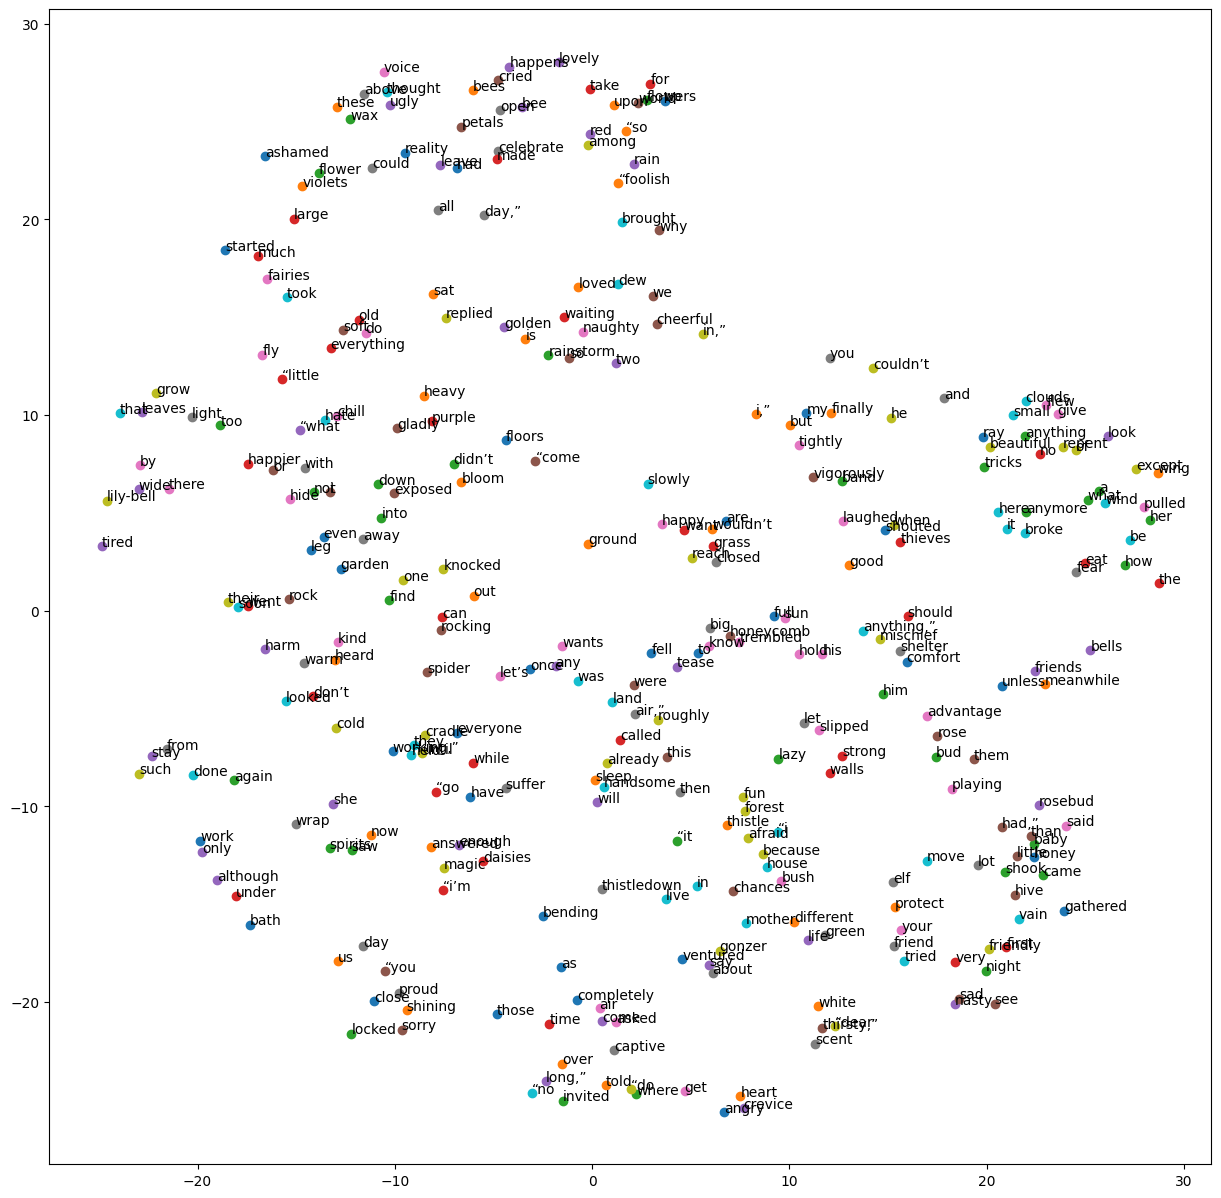

In [21]:
# Step 7: Visualize the embeddings
# Get the weights of the embeddings
embeddings = model.embeddings.weight.data.numpy()

# dimensionality reduction to 2 dimensions using t-SNE for visualization
from sklearn.manifold import TSNE
embeddings = TSNE(n_components=2).fit_transform(embeddings)

# Plot the embeddings
fig, ax = plt.subplots(figsize=(15, 15))
# plot only half of the embeddings to keep the plot readable
for word in vocab[:int(len(vocab)/2)]:  
    embedding = embeddings[vocab.index(word)]
    plt.scatter(embedding[0], embedding[1])
    ax.annotate(word, (embedding[0], embedding[1]))

plt.show()